In [1]:
import pandas as pd

orders = pd.read_csv('./data/Orders.csv')
returns = pd.read_csv('./data/Returns.csv')
pd.set_option('display.max_columns', None)

In [2]:
orders.Profit = orders.Profit.replace('[\$,]', '', regex=True).astype(float)
orders.Sales = orders.Sales.replace('[\$,]', '', regex=True).astype(float)

In [3]:
orders.head(10)
# returns.head(10)
# orders['Order.ID']
orders['Month'] = pd.DatetimeIndex(orders['Order.Date']).month

In [4]:
def month_to_season(month):
  if month in [3,4,5]:
    month = 'spring'
  elif month in [6,7,8]:
    month = 'summer'
  elif month in [9,10,11]:
    month = 'fall'
  else:
    month = 'winter'
  return(month)

In [8]:
def month_to_season(month):
  if (month > 2) & (month < 6):
    month = 'spring'
  elif (month > 5) & (month < 9):
    month = 'summer'
  elif (month > 8) & (month < 12):
    month = 'fall'
  else:
    month = 'winter'
  return(month)

In [9]:
orders['season'] = orders.Month.apply(month_to_season)

In [10]:
orders.sample(10)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,season
1718,2093,MX-2014-BS1138026-41985,12/12/14,12/14/14,First Class,BS-1138026,Bill Stewart,Corporate,NaN,Santiago,Santiago,Chile,South America,LATAM,TEC-CO-5991,Technology,Copiers,"Sharp Copy Machine, High-Speed",477.84,3,0.002,142.68,148.192,High,12,winter
20006,37924,CA-2012-EH13990140-41051,5/22/12,5/26/12,Standard Class,EH-139901404,Erica Hackney,Consumer,98006.0,Bellevue,Washington,United States,Western US,USCA,OFF-PA-6558,Office Supplies,Paper,Xerox 1999,12.96,2,0.000,6.22,1.850,High,5,spring
3845,7289,MX-2015-JE1574555-42278,10/1/15,10/4/15,First Class,JE-1574555,Joel Eaton,Consumer,NaN,La Ceiba,Atlántida,Honduras,Central America,LATAM,TEC-AC-4186,Technology,Accessories,"Enermax Router, Erganomic",204.91,2,0.400,-122.97,82.231,Critical,10,fall
41269,50156,KZ-2015-SP1062068-42066,3/3/15,3/5/15,First Class,SP-1062068,Stefania Perrino,Corporate,NaN,Almaty,Almaty City,Kazakhstan,Central Asia,Asia Pacific,OFF-ST-4263,Office Supplies,Storage,"Fellowes Folders, Single Width",7.93,1,0.700,-7.67,2.020,Medium,3,spring
35526,44441,RS-2015-NC8535108-42190,7/5/15,7/9/15,Standard Class,NC-8535108,Nick Crebassa,Corporate,NaN,Makhachkala,Dagestan,Russia,Eastern Europe,Europe,OFF-FA-3044,Office Supplies,Fasteners,"Advantus Paper Clips, Assorted Sizes",22.80,2,0.000,3.42,3.430,High,7,summer
40806,3071,MX-2012-VG2180531-41214,11/1/12,11/7/12,Standard Class,VG-2180531,Vivek Grady,Corporate,NaN,Guantánamo,Guantánamo,Cuba,Caribbean,LATAM,FUR-FU-5721,Furniture,Furnishings,"Rubbermaid Clock, Erganomic",32.52,1,0.000,13.32,2.070,Medium,11,fall
36300,24612,IN-2012-BD117257-41151,8/30/12,9/3/12,Standard Class,BD-117257,Bruce Degenhardt,Consumer,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,OFF-FA-5481,Office Supplies,Fasteners,"OIC Staples, Assorted Sizes",23.73,3,0.100,-2.19,3.200,High,8,summer
48970,47714,NI-2012-JD601595-41259,12/16/12,12/19/12,First Class,JD-601595,Joy Daniels,Consumer,NaN,Kaduna,Kaduna,Nigeria,Western Africa,Africa,OFF-BI-3722,Office Supplies,Binders,"Cardinal Binder, Economy",4.15,1,0.700,-4.58,1.300,High,12,winter
36725,43252,TU-2014-SB10290134-41852,8/1/14,8/5/14,Standard Class,SB-10290134,Sean Braxton,Corporate,NaN,Adana,Adana,Turkey,Western Asia,Asia Pacific,TEC-CO-4765,Technology,Copiers,"HP Copy Machine, Color",98.05,1,0.600,-63.74,3.090,Medium,8,summer
24178,41325,TU-2015-AS10045134-42136,5/12/15,5/17/15,Second Class,AS-10045134,Aaron Smayling,Corporate,NaN,Bagcilar,Istanbul,Turkey,Western Asia,Asia Pacific,FUR-FU-3943,Furniture,Furnishings,"Deflect-O Frame, Erganomic",86.93,2,0.600,-126.07,8.760,Medium,5,spring


In [119]:
season_category = orders.groupby(['season','Category']).agg({'Row.ID':'count', 'Profit':'sum'})

In [120]:
season_category = season_category.reset_index()

In [121]:
# season_category = season_category.set_index('season')
season_category

,season,Category,Row.ID,Profit
0,fall,Furniture,3347,113388.94
1,fall,Office Supplies,10170,163654.58
2,fall,Technology,3308,227549.67
3,spring,Furniture,1856,41635.46
4,spring,Office Supplies,6054,104256.93
5,spring,Technology,1916,126773.70
6,summer,Furniture,2488,63350.29
7,summer,Office Supplies,8381,136797.00
8,summer,Technology,2693,175576.04
9,winter,Furniture,2169,66707.93


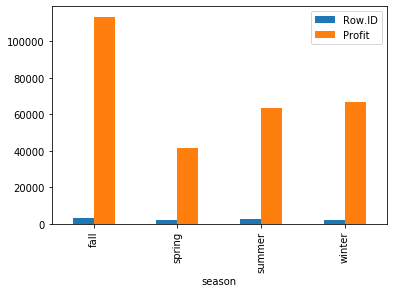

In [110]:
season_category[season_category.Category =='Furniture'].plot.bar()

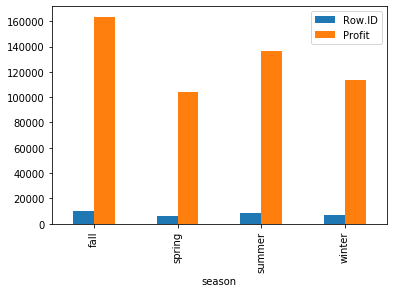

In [111]:
season_category[season_category.Category =='Office Supplies'].plot.bar()

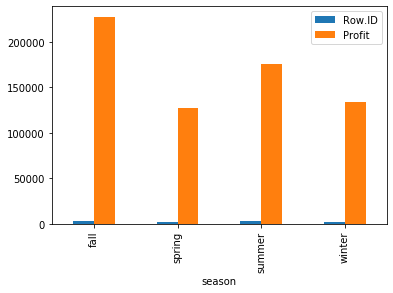

In [112]:
season_category[season_category.Category =='Technology'].plot.bar()

Furniture category had a slight drop in sales in spring and summer, but overall all categories followed a similar trend from overall (Winter < Spring < Summer < Fall)